# Predict Student dropout using ML- PersonalML project1

## Import all the necessary liabraries

In [170]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix


## Load the dataset into a pandas DF

In [171]:
studentDropout_df = pd.read_csv(r'C:\Users\itumeleng\Desktop\Python Programs\StudentDropout.csv')

## Inspect the dataset (Exploratory Analysis)

### Check how many rows and columns are in the table

In [172]:
print(f'This dataset contains {studentDropout_df.shape[0]} Observations and {studentDropout_df.shape[1]} Attributes')

This dataset contains 4424 Observations and 37 Attributes


### Check the first five observations

In [173]:
studentDropout_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Check the last five observations

In [174]:
studentDropout_df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


### Check descriptive statistics

In [175]:
studentDropout_df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Check if there are any null records

In [176]:
studentDropout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [177]:
emptyRec = studentDropout_df.isna().sum()
print(f'The number of null instances in each column is:\n{emptyRec}')

The number of null instances in each column is:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship hold

## Visualize the data

### View the distribution of the target variable

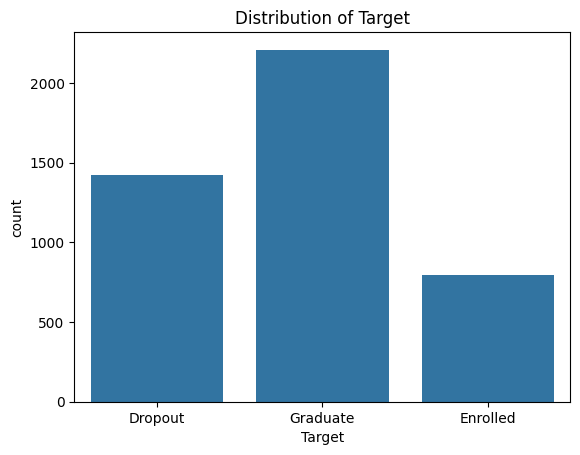

In [178]:
sns.countplot(x='Target',data=studentDropout_df)
plt.title('Distribution of Target')
plt.show()

### View correlation heatmap

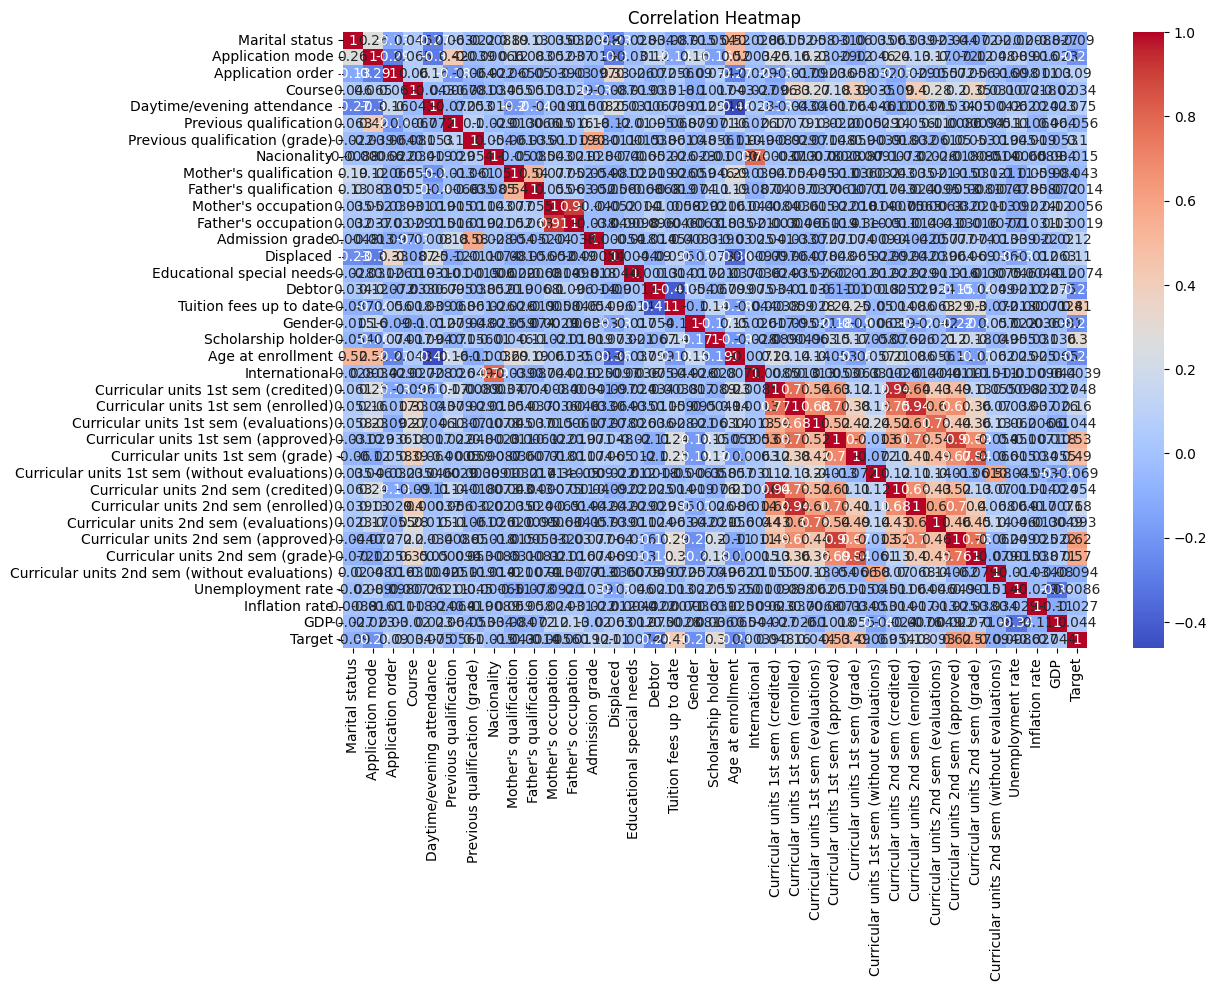

In [193]:
plt.figure(figsize=(12,8))
sns.heatmap(studentDropout_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### View a pairplot using selected features

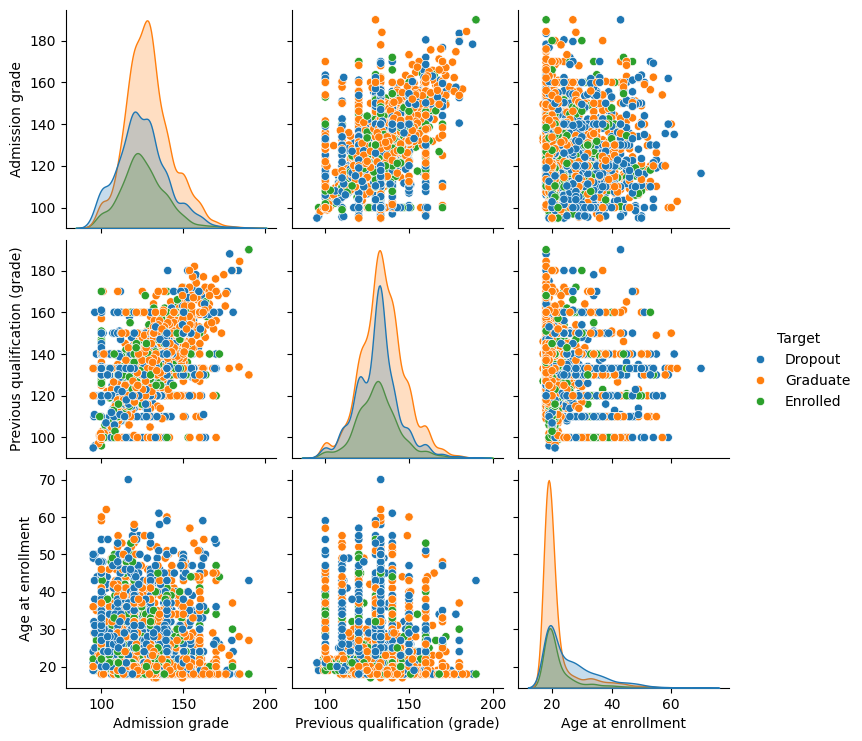

In [180]:
sns.pairplot(studentDropout_df[['Admission grade','Previous qualification (grade)','Age at enrollment','Target']],hue='Target')
plt.show()

## Data Preprocessing

### Encode the Target column from categorical into numeric attributes

In [181]:
labelEncoder = LabelEncoder()
studentDropout_df['Target'].head()

0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Target, dtype: object

In [182]:
studentDropout_df['Target'] = labelEncoder.fit_transform(studentDropout_df['Target'])
studentDropout_df['Target'].head()

0    0
1    2
2    0
3    2
4    2
Name: Target, dtype: int64

### Feature Scaling 

#### Seperate Target variable (y) and Feature Variable (X)

In [183]:
X = studentDropout_df.drop('Target',axis=1)
y = studentDropout_df['Target']

#### Scale the feature variables

In [184]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Split the data into train and test datasets (for both X and y variables)

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

## Model Implementation

### Initialize the model

In [186]:
model = LogisticRegression()

### Train the model

In [187]:
model.fit(X_train,y_train)

LogisticRegression()

### Use trained model to make predictions using the X_test data

In [188]:
y_pred = model.predict(X_test)

## Evaluate the model: Compare the predictions made by the model (y_pred) to the actual targets (y_test)

### Check model accuracy

In [189]:
modelAccuracy = accuracy_score(y_pred,y_test) * 100
print(f'This model has an accuracy of: {round(modelAccuracy,2)} %')

This model has an accuracy of: 75.9 %


### Evaluate classification report

In [190]:
classRep = classification_report(y_pred,y_test)
classRep

'              precision    recall  f1-score   support\n\n           0       0.78      0.81      0.80       429\n           1       0.31      0.51      0.38       147\n           2       0.91      0.78      0.84       752\n\n    accuracy                           0.76      1328\n   macro avg       0.67      0.70      0.67      1328\nweighted avg       0.81      0.76      0.78      1328\n'

### Evaluate the confusion matrix

In [191]:
confusionMatrix = confusion_matrix(y_pred,y_test)

#### Visualise the confusion matrix

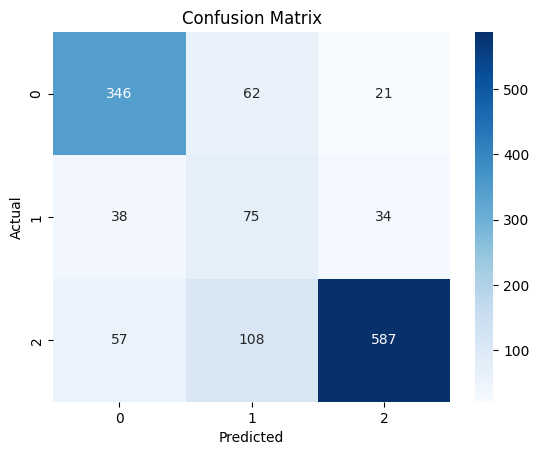

In [196]:
sns.heatmap(confusionMatrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()